<a href="https://colab.research.google.com/github/BishalChhetri/BishalChhetri/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
car=pd.read_csv('/content/drive/MyDrive/ScrappedData.csv')
car.head()


,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Status,Price
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,40409,USED,Rs. 975000
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,30135,USED,Rs. 3000000
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,42000,USED,Rs. 975000
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,51000,USED,Rs. 3000000
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,Sky Blue,9.0,38000,USED,Rs. 1000000


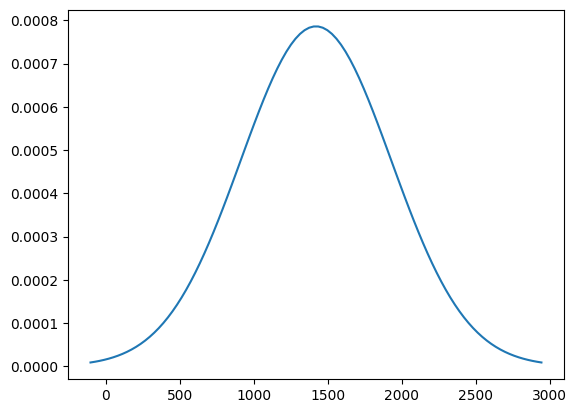

In [4]:
import scipy.stats as stats
import math

df_eng = car['Engine_size(cc)']


# mean
mu = df_eng.mean()

# variance
variance = df_eng.var()


sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

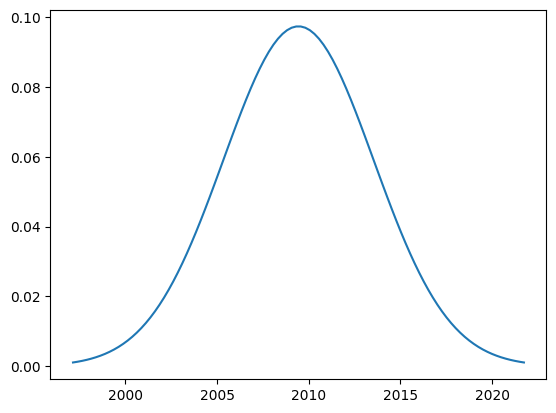

In [5]:
import scipy.stats as stats
import math

df_eng = car['Model_year']


# mean
mu = df_eng.mean()

# variance
variance = df_eng.var()


sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [6]:
car.dropna(inplace=True)

In [7]:
car['Price'] = car['Price'].apply(lambda x: float(x.replace('Rs.','')))

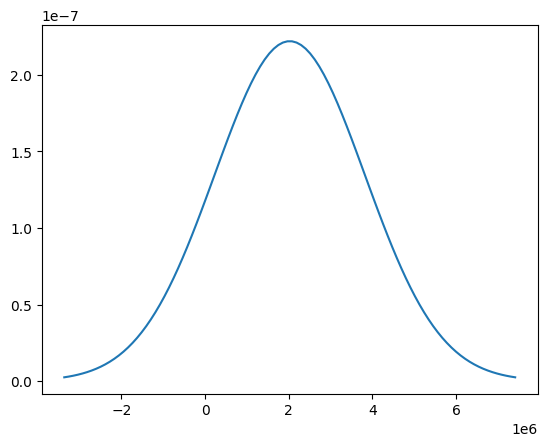

In [8]:
df_eng = car['Price']


# mean
mu = df_eng.mean()

# variance
variance = df_eng.var()


sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model            1901 non-null   object 
 2   Model_year       1901 non-null   float64
 3   Transmission     1901 non-null   object 
 4   Engine_size(cc)  1901 non-null   float64
 5   Drivetrain       1901 non-null   object 
 6   Fuel_type        1901 non-null   object 
 7   Colour           1901 non-null   object 
 8   Lot_no           1901 non-null   float64
 9   Kilometer        1901 non-null   object 
 10  Status           1901 non-null   object 
 11  Price            1901 non-null   float64
dtypes: float64(4), object(8)
memory usage: 193.1+ KB


In [10]:
#car.dropna(inplace = True)
#car['Price'] = car['Price'].apply(lambda x: float(x.replace('Rs.','')))
#plt.scatter(x = car['Engine_size(cc)'], y = car['Price'], data = car)


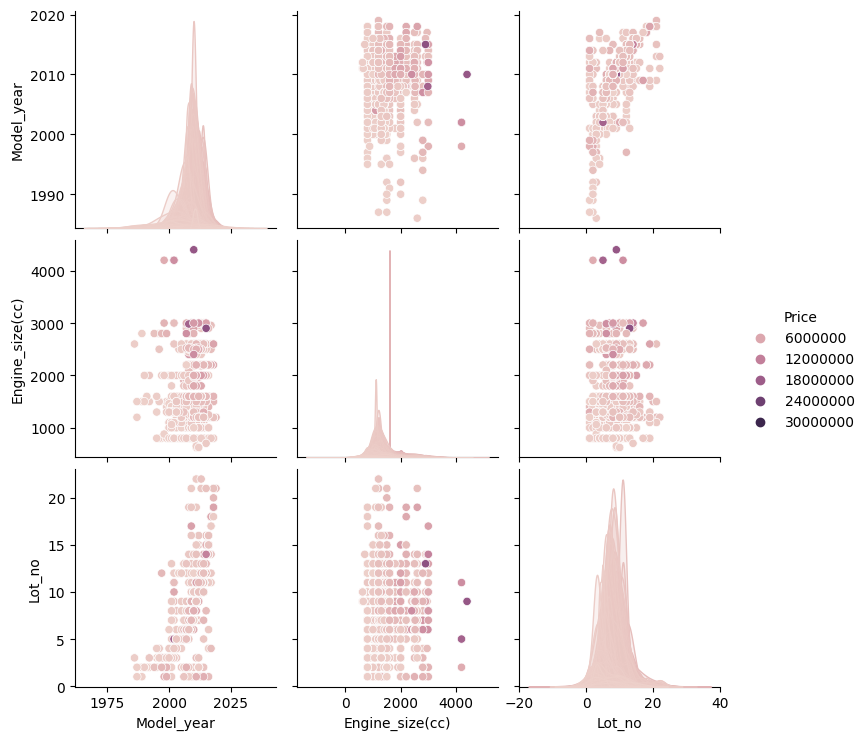

In [11]:
sns.pairplot(car,hue='Price')

In [12]:
car.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Colour,Lot_no,Kilometer,Status,Price
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,40409,USED,975000.0
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,30135,USED,3000000.0
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,golden,6.0,42000,USED,975000.0
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,Grey,8.0,51000,USED,3000000.0
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,Sky Blue,9.0,38000,USED,1000000.0


<Axes: >

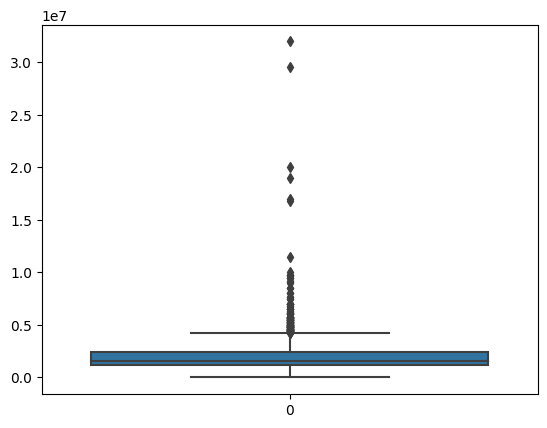

In [13]:

sns.boxplot(car.Price)


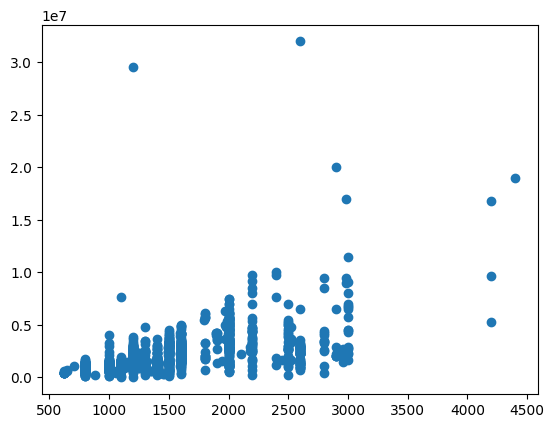

In [14]:
plt.scatter(x = 'Engine_size(cc)', y = 'Price', data = car)

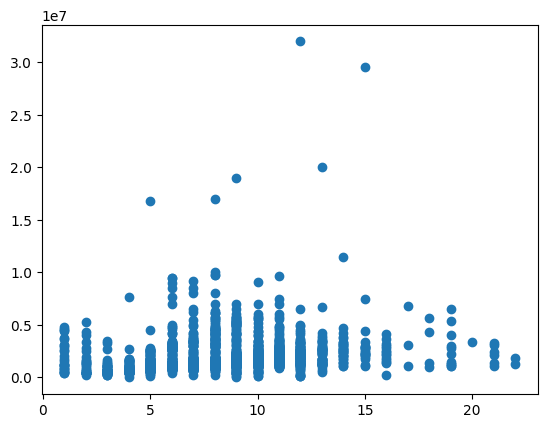

In [15]:
plt.scatter(x = 'Lot_no', y = 'Price', data = car)

In [16]:
car.dropna(inplace = True)

In [17]:
#df = pd.get_dummies(car['Colour'])

In [18]:
#df.head()

In [19]:
#df.head()

In [20]:
#df.corr(method= 'pearson')

In [21]:
#sns.displot()

In [22]:
car=car[['Brand','Model','Model_year','Transmission','Engine_size(cc)',
 'Drivetrain','Fuel_type','Lot_no','Kilometer','Price']]

In [23]:
car.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer,Price
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,6.0,40409,975000.0
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,8.0,30135,3000000.0
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,6.0,42000,975000.0
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,8.0,51000,3000000.0
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,9.0,38000,1000000.0


In [24]:
car.dropna(inplace=True)

<ipython-input-24-7099e05849a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.dropna(inplace=True)


In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model            1901 non-null   object 
 2   Model_year       1901 non-null   float64
 3   Transmission     1901 non-null   object 
 4   Engine_size(cc)  1901 non-null   float64
 5   Drivetrain       1901 non-null   object 
 6   Fuel_type        1901 non-null   object 
 7   Lot_no           1901 non-null   float64
 8   Kilometer        1901 non-null   object 
 9   Price            1901 non-null   float64
dtypes: float64(4), object(6)
memory usage: 227.9+ KB


In [26]:
car["Kilometer"] = pd.to_numeric(car.Kilometer, errors='coerce')

car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2216
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1901 non-null   object 
 1   Model            1901 non-null   object 
 2   Model_year       1901 non-null   float64
 3   Transmission     1901 non-null   object 
 4   Engine_size(cc)  1901 non-null   float64
 5   Drivetrain       1901 non-null   object 
 6   Fuel_type        1901 non-null   object 
 7   Lot_no           1901 non-null   float64
 8   Kilometer        1900 non-null   float64
 9   Price            1901 non-null   float64
dtypes: float64(5), object(5)
memory usage: 227.9+ KB


<ipython-input-26-0ecd0d730f65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car["Kilometer"] = pd.to_numeric(car.Kilometer, errors='coerce')


In [27]:
car.dropna(inplace=True)

<ipython-input-27-7099e05849a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.dropna(inplace=True)


Text(0, 0.5, 'Model_year')

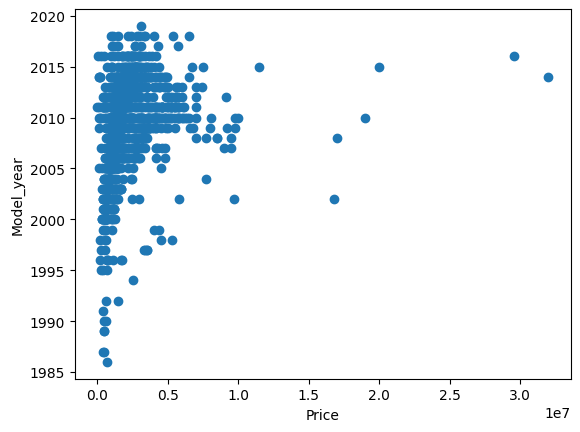

In [28]:
plt.scatter(x='Price',y='Model_year',data=car)
plt.xlabel("Price")
plt.ylabel("Model_year")

In [29]:
car.head()

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer,Price
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,6.0,40409.0,975000.0
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,8.0,30135.0,3000000.0
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,6.0,42000.0,975000.0
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,8.0,51000.0,3000000.0
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,9.0,38000.0,1000000.0


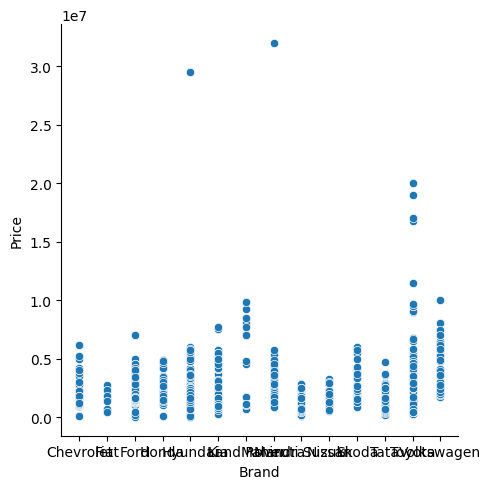

In [30]:
sns.relplot(x="Brand", y="Price", data=car);

<Axes: xlabel='Price', ylabel='Brand'>

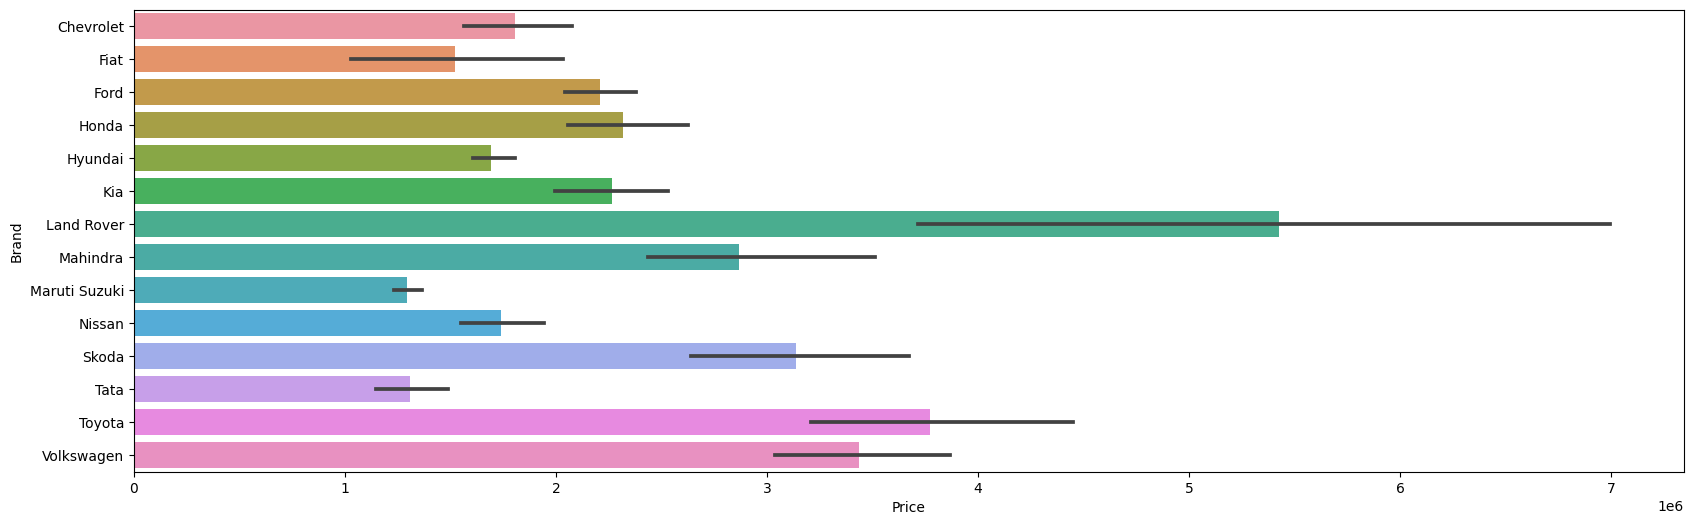

In [31]:
plt.figure(figsize = (20,6))
sns.barplot(data = car, x = 'Price', y = 'Brand')

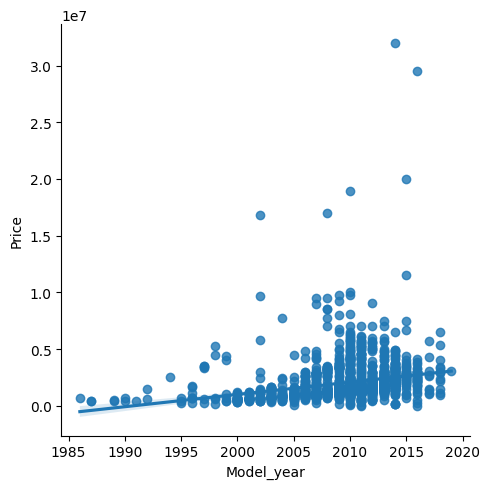

In [32]:
sns.lmplot(x='Model_year',y='Price',data=car)

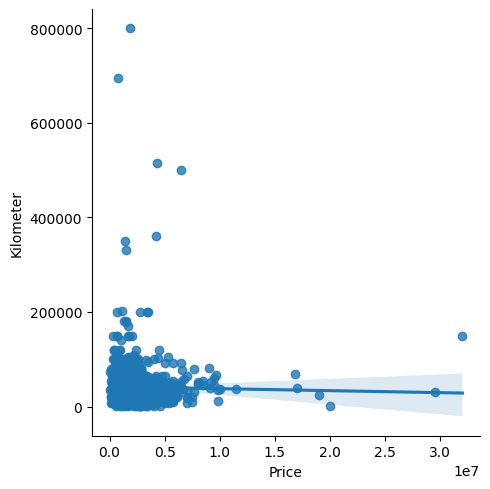

In [33]:
sns.lmplot(x='Price',y='Kilometer',data=car)

In [34]:
X=car.drop(columns='Price')
y=car['Price']

Text(0, 0.5, 'Count of cars')

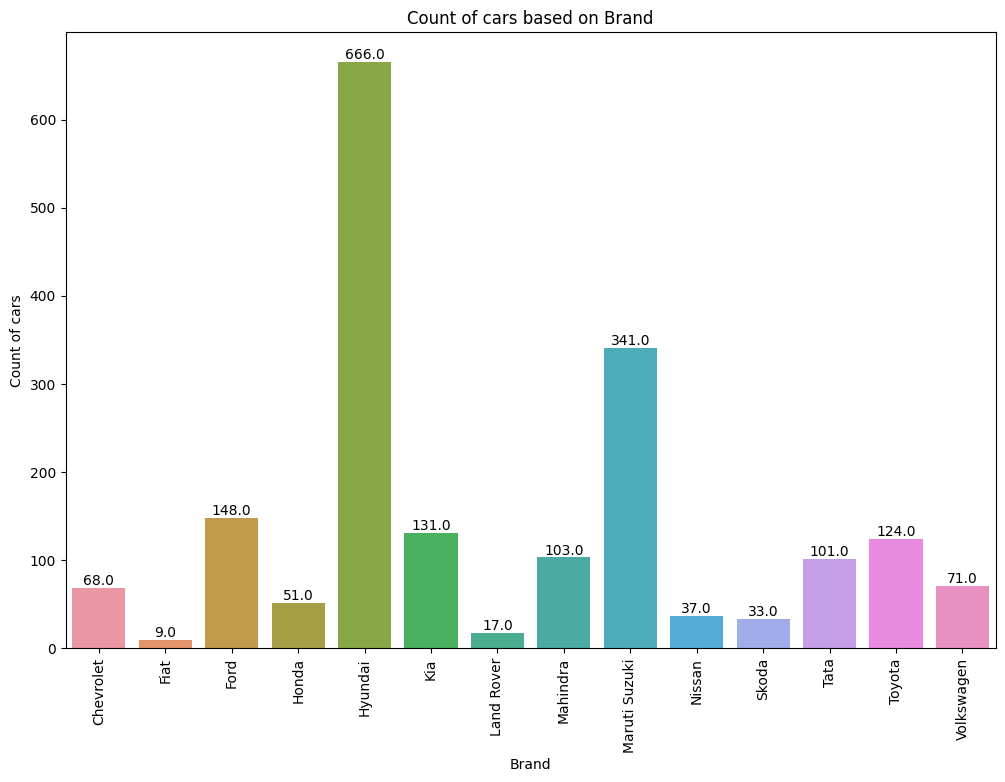

In [35]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = car)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Brand")
plt.xlabel("Brand")
plt.ylabel("Count of cars")

In [36]:
X

,Brand,Model,Model_year,Transmission,Engine_size(cc),Drivetrain,Fuel_type,Lot_no,Kilometer
0,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,6.0,40409.0
1,Chevrolet,captiva,2015.0,Automatic,2000.0,4WD,Diesel,8.0,30135.0
2,Chevrolet,aveo,2009.0,Manual,1150.0,2WD,Petrol,6.0,42000.0
3,Chevrolet,captiva,2010.0,Automatic,2000.0,4WD,Diesel,8.0,51000.0
4,Chevrolet,spark,2012.0,Manual,1000.0,2WD,Petrol,9.0,38000.0
...,...,...,...,...,...,...,...,...,...
2210,Volkswagen,polo,2013.0,Manual,1600.0,2WD,Petrol,11.0,6300.0
2211,Volkswagen,beetle,2010.0,Manual,1595.0,2WD,Petrol,8.0,19000.0
2212,Volkswagen,passat,2010.0,Manual,1800.0,2WD,Petrol,8.0,11000.0
2214,Volkswagen,tiguan,2010.0,Manual,2000.0,2WD,Petrol,8.0,25000.0


In [37]:
y

0        975000.0
1       3000000.0
2        975000.0
3       3000000.0
4       1000000.0
          ...    
2210    2700000.0
2211    3950000.0
2212    5800000.0
2214    4900000.0
2216    3555555.0
Name: Price, Length: 1900, dtype: float64

In [38]:
car.isnull().sum()

Brand              0
Model              0
Model_year         0
Transmission       0
Engine_size(cc)    0
Drivetrain         0
Fuel_type          0
Lot_no             0
Kilometer          0
Price              0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=230)


In [40]:
list1=[]
for col in X_train.columns:
  if X_train[col].dtypes!='O':
   list1.append(col)

In [41]:
list2=[]
for col in X_train.columns:
  if X_train[col].dtypes=='O':
   list2.append(col)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
ohe=OneHotEncoder()
ohe.fit(X[list2])


OneHotEncoder()

In [44]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),list2),remainder='passthrough')


In [45]:
column_trans.fit_transform(X)

<1900x119 sparse matrix of type '<class 'numpy.float64'>'
	with 17100 stored elements in Compressed Sparse Row format>

In [46]:
lr = LinearRegression()


In [47]:
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train ,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Chevrolet', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia',
       'Land Rover', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen'], dtype=object),
                                                                            array(['800', 'Kuv', 'Omni', 'a-star', 'accent', 'ace', 'alto',
       '...
       'sumo', 'sunny', 'superb', 'swift', 'tiguan', 'tiida', 'titanium',
       'touareg', 'tucson', 'u-va', 'uva', 'vento', 'venture'],
      dtype=object),
                                                                            array([' ', ' Automatic', ' Manual'], dtype=object),
                                                                            array([' 2WD', ' 4WD'], dtype=object),
                                                                            array([' Diesel', ' Petrol'], dtype=object)]),
                                                  ['Brand', 'Model',
                                                   'Transmission', 'Drivetrain',
                                                   'Fuel_type'])])),
                ('linearregression', LinearRegression())])

In [48]:
y_pred=pipe.predict(X_test)

In [49]:
print(y_test)

1829    2750000.0
1276     450000.0
1703    1375000.0
310     1225000.0
1777    6000000.0
          ...    
1335    1450000.0
490     1625000.0
888     1550000.0
1885     437000.0
2070    3675000.0
Name: Price, Length: 380, dtype: float64


In [50]:
print(y_pred)

[ 4325895.8842999    290667.25792596  1516589.49201378  1485392.03832543
  3897862.21806076  3620824.87890574  3050927.23193547  1929844.6616233
  1499188.82344678  1154720.15616104  1453547.50092608  2371841.29882458
  1778228.9971579   1257943.2862162   1738716.89747924  5236904.08572569
  1516556.82758588  1722019.17856368  2283492.11892825  1638694.44496068
  1611298.97864193   728282.27848274  1576892.87566626  2598995.07435998
  1872393.02116483   965260.99204478  1689714.75621137  1242923.85581601
  1107465.62308371  2193713.76892957  1749970.02965996  2693375.72358331
  3996018.67844197   -60341.88174331  -166766.14186794  2883258.1867871
  1773934.93292466  2240774.91493589  2079406.77890792  4881867.04754141
  2692775.53001401   655666.93179932  1272137.76673171  2312860.8808783
  1417363.58953208  1463560.45452622  1980833.1122123   2006357.344735
  1102326.98618701  1555237.64083165  4507219.27206263  2144845.63298276
  3688840.73166767  2246059.74710548  6260700.2442542   

<ipython-input-51-f7d4a70d285b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Price', ylabel='Density'>

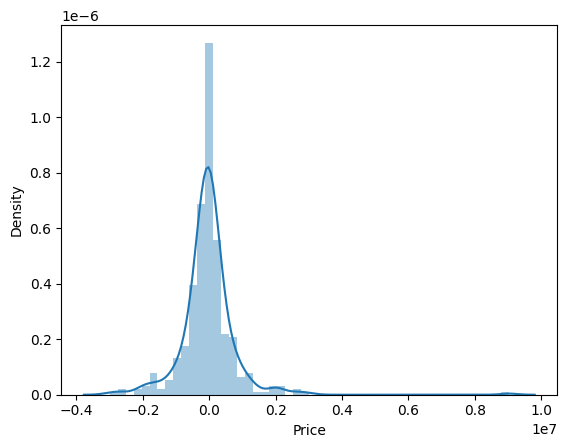

In [51]:
sns.distplot(y_test-y_pred)

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_test")

In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.3490724625778341


In [62]:
score=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    score.append(r2_score(y_test,y_pred))
print(np.argmax(score))

784


In [54]:
score[np.argmax(score)]

0.7473917829876044

In [69]:
plt.scatter(X_train,y_train)
plt.plot(X_train,pipe.predict(X_train))
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [58]:
sqrt(mean_squared_error(y_test,y_pred))

1852156.0878242226